In [1]:
import pandas as pd
import numpy as np
import os
from pandasql import sqldf
from scipy import stats
import time
import networkx as nx
import matplotlib.pyplot as plt
import simple_icd_10_cm as cm

In [ ]:
# ICD-10 Sections model

In [323]:
dataset_loc = '...' # Insert path to dataset with columns: Source Node ("D1"), Destination Node ("D2"), Relative Risk ("RR")

ICDSections = pd.read_csv(dataset_loc)
ICDSections = ICDSections[ICDSections['RR']>1] # Filter out only pairs with RR > 1

In [324]:
# Get description of ICD-10 section

def label_icd1(row):
    return cm.get_description(row['D1'])

def label_icd2(row):
    return cm.get_description(row['D2'])

ICDSections['D1_name'] = ICDSections.apply(lambda row: label_icd1(row), axis=1)
ICDSections['D2_name'] = ICDSections.apply(lambda row: label_icd2(row), axis=1)

In [327]:
ICDSections['RR'] = ICDSections['RR'].apply(lambda x: x**3) # Cube RR to produce more prominent arcs (better for visualisation)
ICDSections = ICDSections.sample(frac=1) # Shuffle randomly
ICDSections

,D1,D2,RR,D1_name,D2_name
78,K20-K31,F30-F39,1.031150,"Diseases of esophagus, stomach and duodenum (K...",Mood [affective] disorders (F30-F39)
12,D60-D64,J09-J18,1.802833,Aplastic and other anemias and other bone marr...,Influenza and pneumonia (J09-J18)
77,K20-K31,H25-H28,1.035093,"Diseases of esophagus, stomach and duodenum (K...",Disorders of lens (H25-H28)
24,R50-R69,R25-R29,1.460531,General symptoms and signs (R50-R69),Symptoms and signs involving the nervous and m...
42,I10-I16,E70-E88,1.208866,Hypertensive diseases (I10-I16),Metabolic disorders (E70-E88)
...,...,...,...,...,...
48,I20-I25,M05-M14,1.174130,Ischemic heart diseases (I20-I25),Inflammatory polyarthropathies (M05-M14)
73,N30-N39,J09-J18,1.059852,Other diseases of the urinary system (N30-N39),Influenza and pneumonia (J09-J18)
25,E08-E13,J20-J22,1.455471,Diabetes mellitus (E08-E13),Other acute lower respiratory infections (J20-...
20,E08-E13,N17-N19,1.521886,Diabetes mellitus (E08-E13),Acute kidney failure and chronic kidney diseas...


In [328]:
# Create graph

G = nx.from_pandas_edgelist(ICDSections, source= 'D1', target = 'D2', edge_attr = 'RR', create_using = nx.DiGraph)

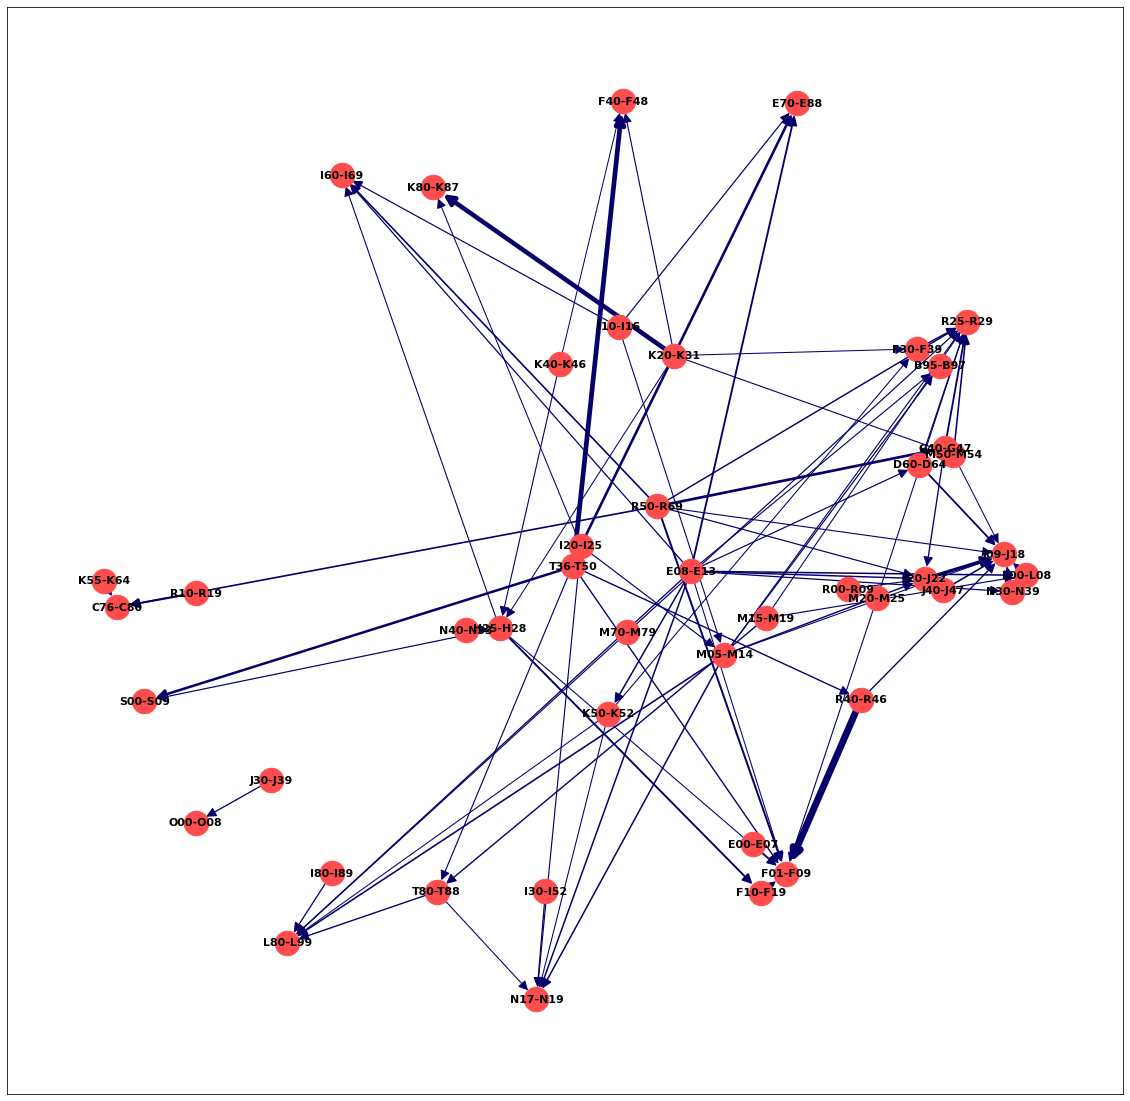

In [330]:
# Spring layout

plt.figure(1, figsize = (20,20))
edges = G.edges()
weights = [G[u][v]['RR'] for u,v in edges]
nx.draw_networkx(G,pos=nx.spring_layout(G), node_color = '#ff4d4d', edge_color = '#07006b', arrows=True, arrowsize = 20, 
                 node_size = 600, font_size = 11, font_weight = 'bold', width = weights)

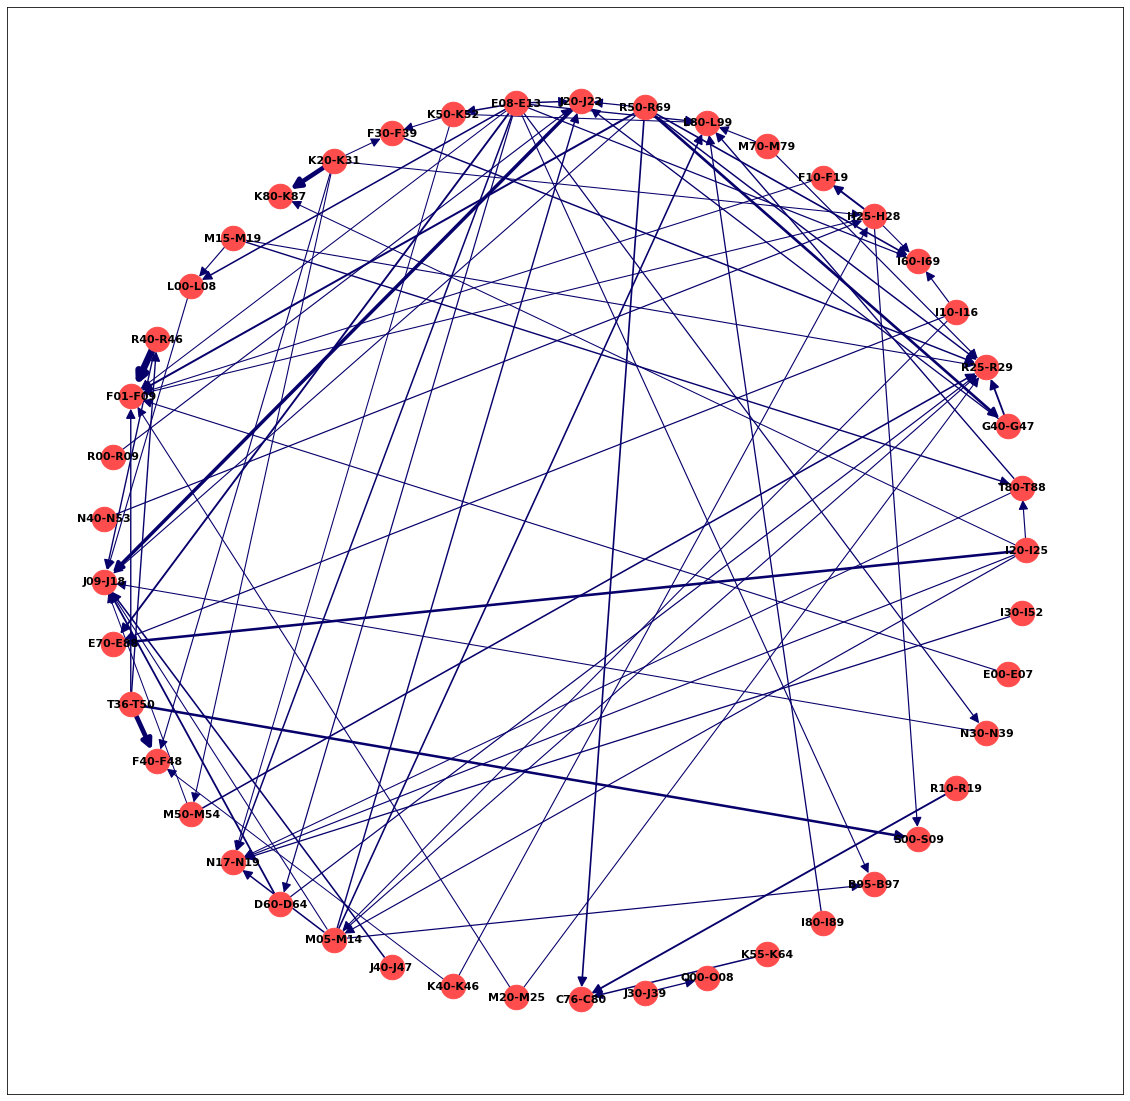

In [291]:
# Circular layout

plt.figure(1, figsize = (20,20))
edges = G.edges()
weights = [G[u][v]['RR'] for u,v in edges]
nx.draw_networkx(G,pos=nx.circular_layout(G), node_color = '#ff4d4d', edge_color = '#07006b', arrows=True, arrowsize = 20, 
                 node_size = 600, font_size = 11, font_weight = 'bold', width = weights)

In [ ]:
# BNF model

In [26]:
dataset_loc = '...' # Insert path to dataset with columns: Source Node ("D1"), Destination Node ("D2"), Relative Risk ("RR")

BNFSections = pd.read_csv(dataset_loc)
BNFSections = BNFSections[BNFSections['RR']>1.2] # Filter out only pairs with RR > 1.2

In [40]:
BNFSections['RR'] = BNFSections['RR'].apply(lambda x: x**2) # Square RR to produce more prominent arcs (better for visualisation)
BNFSections = BNFSections.sample(frac=1) # Shuffle randomly

# Add in leading zeroes so that all BNF sections are four characters
BNFSections['D1'] = BNFSections['D1'].astype(str).apply(lambda x: x.zfill(4))
BNFSections['D2'] = BNFSections['D2'].astype(str).apply(lambda x: x.zfill(4))
BNFSections

,D1,D2,RR
54,0101,0309,1.546092
39,0102,0402,1.631851
36,0102,0904,1.690208
17,0403,0408,1.880958
9,1201,1104,2.213187
...,...,...,...
40,1003,0309,1.613660
21,0901,0904,1.819754
60,1201,1108,1.500489
18,0101,0102,1.866863


In [41]:
# Create graph

G = nx.from_pandas_edgelist(BNFSections, source= 'D1', target = 'D2', edge_attr = 'RR', create_using = nx.DiGraph)

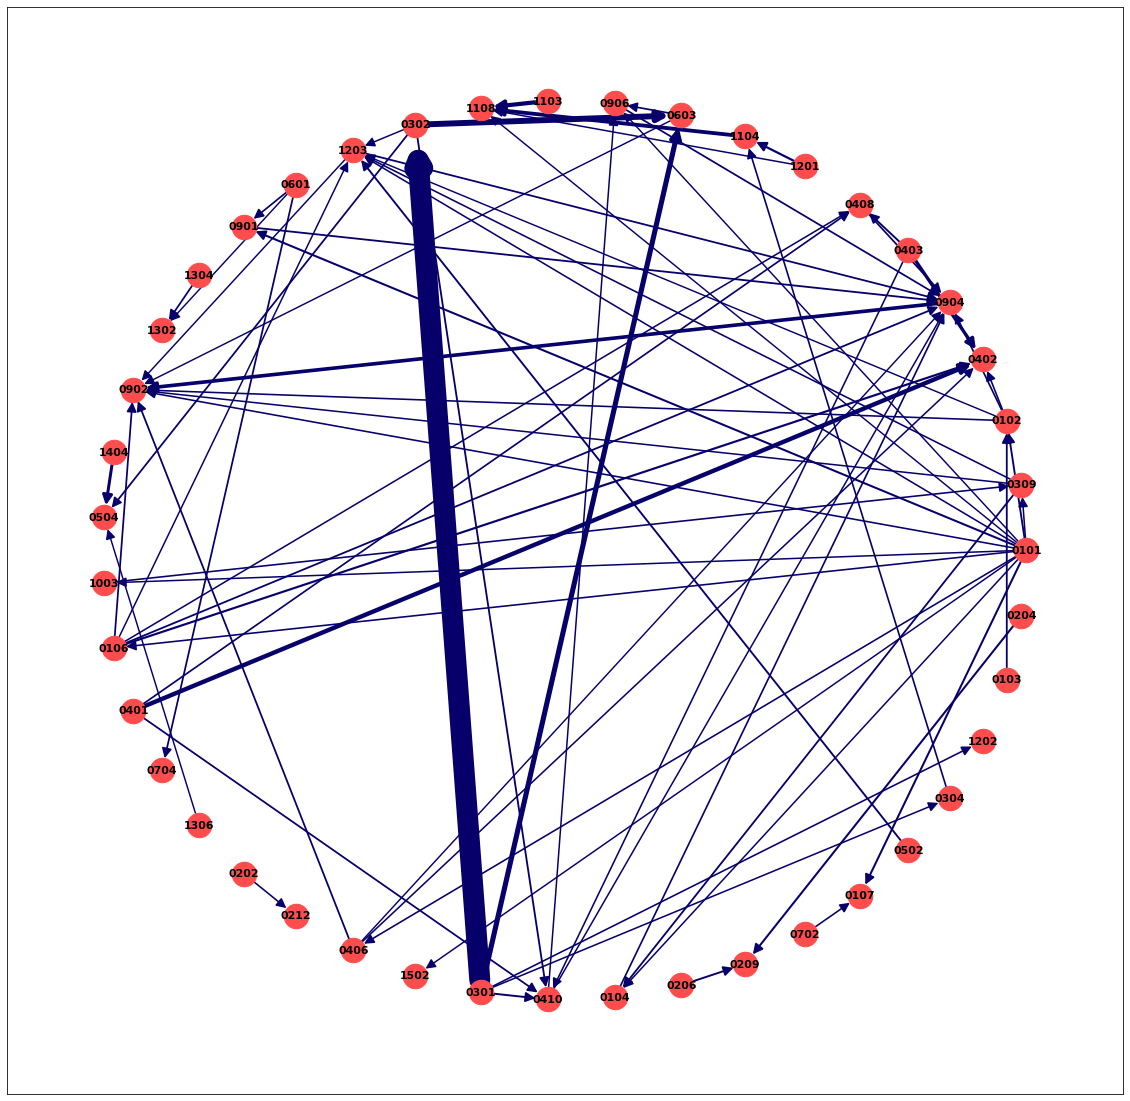

In [42]:
# Circular layout

plt.figure(1, figsize = (20,20))
edges = G.edges()
weights = [G[u][v]['RR'] for u,v in edges]
nx.draw_networkx(G,pos=nx.circular_layout(G), node_color = '#ff4d4d', edge_color = '#07006b', arrows=True, arrowsize = 20, 
                 node_size = 600, font_size = 11, font_weight = 'bold', width = weights)